## Importing the relevant packages


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts 
import seaborn as sns
sns.set()

C:\Users\YOUNIS\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


## Importing the Data and Pre-processing 

In [3]:
raw_csv_data = pd.read_csv("Index2018.csv") 
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')

In [4]:
df_comp['market_value']=df_comp.ftse

In [5]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

## The ACF

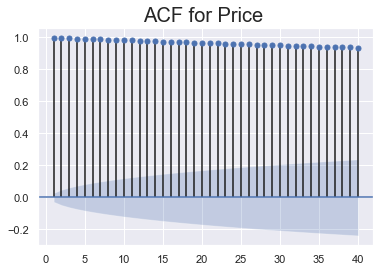

In [6]:
sgt.plot_acf(df.market_value, zero=False , lags=40 )
plt.title("ACF for Price " , size = 20 )
plt.show()

## The PACF

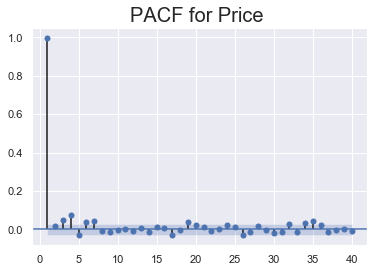

In [7]:
sgt.plot_pacf(df.market_value, lags = 40, alpha = 0.05, zero = False, method='ols')
plt.title("PACF for Price " , size = 20 )
plt.show()

## The AR(1) Model

In [8]:
model_ar = ARMA(df.market_value, order=(1,0))

In [9]:
result_ar = model_ar.fit()

In [10]:
result_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(1, 0)   Log Likelihood              -27622.598
Method:                       css-mle   S.D. of innovations             59.258
Date:                Sat, 11 Apr 2020   AIC                          55251.195
Time:                        16:29:16   BIC                          55270.760
Sample:                    01-07-1994   HQIC                         55258.051
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5049.0892    487.725     10.352      0.000    4093.165    6005.013
ar.L1.market_value     0.9985      0.001   1299.311      0.000       0.997       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0015           +0.0000j            1.0015            0.0000
-----------------------------------------------------------------------------
"""

## Higher-Lag AR Models

In [11]:
model_ar_2 = ARMA(df.market_value, order=(2,0))
result_ar_2 = model_ar_2.fit()
result_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(2, 0)   Log Likelihood              -27621.866
Method:                       css-mle   S.D. of innovations             59.249
Date:                Sat, 11 Apr 2020   AIC                          55251.732
Time:                        16:29:17   BIC                          55277.818
Sample:                    01-07-1994   HQIC                         55260.873
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5021.9725    496.600     10.113      0.000    4048.654    5995.290
ar.L1.market_value     0.9814      0.014     69.596      0.000       0.954       1.009
ar.L2.market_value     0.0171      0.014      1.210      0.226      -0.011       0.045
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0015           +0.0000j            1.0015            0.0000
AR.2          -58.4779           +0.0000j           58.4779            0.5000
-----------------------------------------------------------------------------
"""

In [12]:
model_ar_3 = ARMA(df.market_value, order=(3,0))
result_ar_3 = model_ar_3.fit()
result_ar_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(3, 0)   Log Likelihood              -27615.867
Method:                       css-mle   S.D. of innovations             59.178
Date:                Sat, 11 Apr 2020   AIC                          55241.733
Time:                        16:29:19   BIC                          55274.340
Sample:                    01-07-1994   HQIC                         55253.159
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5055.9143    512.620      9.863      0.000    4051.197    6060.632
ar.L1.market_value     0.9805      0.014     69.610      0.000       0.953       1.008
ar.L2.market_value    -0.0309      0.020     -1.563      0.118      -0.070       0.008
ar.L3.market_value     0.0489      0.014      3.471      0.001       0.021       0.077
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0013           -0.0000j            1.0013           -0.0000
AR.2           -0.1854           -4.5130j            4.5168           -0.2565
AR.3           -0.1854           +4.5130j            4.5168            0.2565
-----------------------------------------------------------------------------
"""

In [13]:
model_ar_4 = ARMA(df.market_value, order=(4,0))
result_ar_4 = model_ar_4.fit()
result_ar_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(4, 0)   Log Likelihood              -27602.565
Method:                       css-mle   S.D. of innovations             59.022
Date:                Sat, 11 Apr 2020   AIC                          55217.130
Time:                        16:29:20   BIC                          55256.258
Sample:                    01-07-1994   HQIC                         55230.841
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6413    559.994      9.089      0.000    3992.074    6187.208
ar.L1.market_value     0.9770      0.014     69.492      0.000       0.949       1.005
ar.L2.market_value    -0.0286      0.020     -1.455      0.146      -0.067       0.010
ar.L3.market_value    -0.0224      0.020     -1.135      0.256      -0.061       0.016
ar.L4.market_value     0.0728      0.014      5.166      0.000       0.045       0.100
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0011           -0.0000j            1.0011           -0.0000
AR.2            0.9550           -2.0884j            2.2964           -0.1817
AR.3            0.9550           +2.0884j            2.2964            0.1817
AR.4           -2.6036           -0.0000j            2.6036           -0.5000
-----------------------------------------------------------------------------
"""

## LLR Test

In [14]:
def LLR_Test(mod_1, mod_2, CF = 1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    P = chi2.sf(LR, CF).round(3)
    return P 
    

## Comparing Higher-Lag AR Models

In [15]:
LLR_Test(model_ar_2, model_ar_3)

0.001

In [16]:
LLR_Test(model_ar_3, model_ar_4)

0.0

In [17]:
model_ar_5 = ARMA(df.market_value, order=(5,0))
result_ar_5 = model_ar_5.fit()
print(result_ar_5.summary())
print("LLR Test P-Value: "+ str(LLR_Test(model_ar_4, model_ar_5)))

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(5, 0)   Log Likelihood              -27600.348
Method:                       css-mle   S.D. of innovations             58.996
Date:                Sat, 11 Apr 2020   AIC                          55214.697
Time:                        16:29:27   BIC                          55260.346
Sample:                    01-07-1994   HQIC                         55230.693
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6413    543.571      9.363      0.000    4024.261    6155.021
ar.L1.market_value     0.9791      0.014     69.481      0.000       0.952       1.007
ar.L2.market_value  

In [18]:
model_ar_6 = ARMA(df.market_value, order=(6,0))
result_ar_6 = model_ar_6.fit()
print(result_ar_6.summary())
print("LLR Test P-Value: "+ str(LLR_Test(model_ar_5, model_ar_6)))

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(6, 0)   Log Likelihood              -27596.474
Method:                       css-mle   S.D. of innovations             58.950
Date:                Sat, 11 Apr 2020   AIC                          55208.947
Time:                        16:29:30   BIC                          55261.118
Sample:                    01-07-1994   HQIC                         55227.229
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6414    565.229      9.005      0.000    3981.813    6197.470
ar.L1.market_value     0.9803      0.014     69.604      0.000       0.953       1.008
ar.L2.market_value  

In [19]:
model_ar_7 = ARMA(df.market_value, order=(7,0))
result_ar_7 = model_ar_7.fit()
print(result_ar_7.summary())
print("LLR Test P-Value: "+ str(LLR_Test(model_ar_6, model_ar_7)))

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(7, 0)   Log Likelihood              -27591.900
Method:                       css-mle   S.D. of innovations             58.896
Date:                Sat, 11 Apr 2020   AIC                          55201.799
Time:                        16:29:35   BIC                          55260.492
Sample:                    01-07-1994   HQIC                         55222.366
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6411    589.591      8.632      0.000    3934.063    6245.219
ar.L1.market_value     0.9786      0.014     69.518      0.000       0.951       1.006
ar.L2.market_value  

In [20]:
model_ar_8 = ARMA(df.market_value, order=(8,0))
result_ar_8 = model_ar_8.fit()
print(result_ar_8.summary())
print("LLR Test P-Value: "+ str(LLR_Test(model_ar_7, model_ar_8)))

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(8, 0)   Log Likelihood              -27591.739
Method:                       css-mle   S.D. of innovations             58.894
Date:                Sat, 11 Apr 2020   AIC                          55203.478
Time:                        16:29:42   BIC                          55268.692
Sample:                    01-07-1994   HQIC                         55226.329
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6414    585.060      8.699      0.000    3942.944    6236.339
ar.L1.market_value     0.9790      0.014     69.476      0.000       0.951       1.007
ar.L2.market_value  

In [21]:
print("LLR Test P-Value: "+ str(LLR_Test(model_ar, model_ar_7, CF = 6 )))

LLR Test P-Value: 0.0


## Analysing the Residuals

In [23]:
df['res_price'] = result_ar_7.resid

C:\Users\YOUNIS\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
df.res_price.mean()

0.35224592137013677

In [25]:
df.res_price.var()

4005.944587411721

In [26]:
sts.adfuller(df.res_price)

(-76.07468330147003,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '5%': -2.8621159253018247,
  '10%': -2.5670765656497516},
 54842.41513509535)

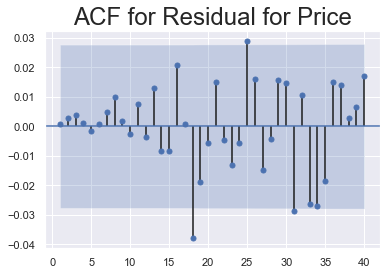

In [27]:
sgt.plot_acf(df.res_price, lags=40 , zero=False)
plt.title("ACF for Residual for Price", size = 24)
plt.show()

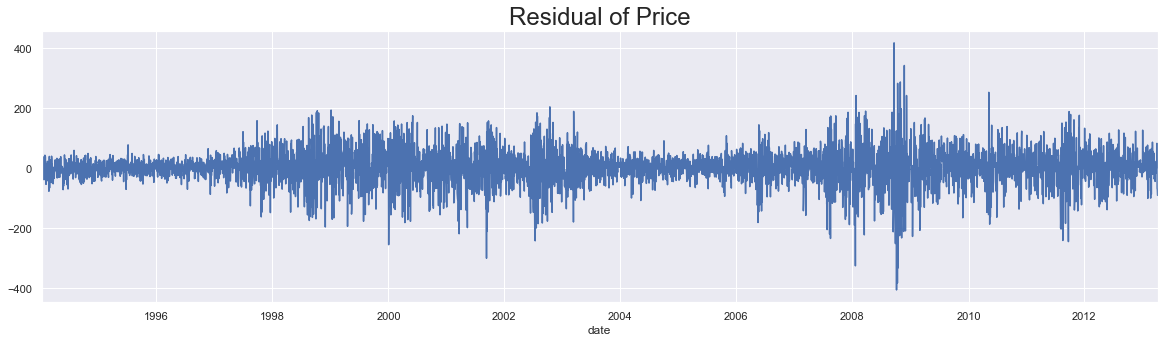

In [28]:
df.res_price[1:].plot(figsize=(20,5))
plt.title("Residual of Price", size= 24)
plt.show()